### 39 - Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from joblib import dump,load

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop('sales', axis=1)
y = df['sales']

In [5]:
#feature converter
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)
#fit (analyze) the dataset
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [13]:
poly_features = polynomial_converter.transform(X)
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [10]:
#check initial dataset shape
X.shape

(200, 3)

In [11]:
#check shape
poly_features.shape


(200, 9)

In [25]:
#check for features
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [14]:
#train test split
#replace X with poly features
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [17]:
#call the linear regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
test_predictions = model.predict(X_test)
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [21]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [23]:
print(MAE)
print(RMSE)

0.48967980448035886
0.6646431757269


In [26]:
#Tuning hyperparameters
#create different poly order, split poly feature train/test, fit on train, and then store/save the rmse for BOTH train and test set
#Plot error vs polynomial order

train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
  poly_converter = PolynomialFeatures(degree=d, include_bias=False)
  poly_features = poly_converter.fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
  
  model = LinearRegression()
  model.fit(X_train, y_train)
  
  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)
  
  train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
  test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
  
  train_rmse_errors.append(train_rmse)
  test_rmse_errors.append(test_rmse)
  

In [27]:
#check training list
train_rmse_errors

[1.734594124329376,
 0.5879574085292234,
 0.43393443569020657,
 0.35170836883993556,
 0.2509342923789987,
 0.19399757603273932,
 5.421982503302247,
 0.1519554915781105,
 0.17181489440322673]

In [28]:
#check test list
test_rmse_errors

[1.5161519375993877,
 0.6646431757269,
 0.5803286825219469,
 0.5077742640851456,
 2.575819388953378,
 4.319765294961401,
 1378.531526416359,
 3090.516288100603,
 96216.91641765335]

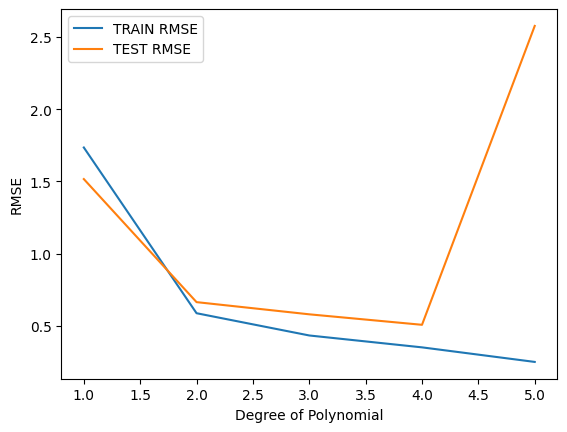

In [34]:
plt.plot(range(1,6), train_rmse_errors[:5], label='TRAIN RMSE')
plt.plot(range(1,6), test_rmse_errors[:5], label='TEST RMSE')

plt.ylabel('RMSE')
plt.xlabel('Degree of Polynomial')
plt.legend()

In [35]:
#Model finalization and deployment
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)
final_model = LinearRegression()

full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X, y)

LinearRegression()

In [36]:
#save and load model
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [37]:
#dump converter
dump(final_poly_converter, 'final_converter.joblib')

['final_converter.joblib']

In [38]:
#load and run model on new data
loaded_converter = load('final_converter.joblib')
loaded_model = load('final_poly_model.joblib')

In [43]:
campaign = [[149, 22, 12]]
transformed_Data = loaded_converter.fit_transform(campaign)

#predict data
loaded_model.predict(transformed_Data)

array([14.64501014])